In [96]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from hdf5_dataset import HDF5Dataset
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [97]:
# Load the dataset
train_set = HDF5Dataset("mnist_traindata.hdf5", "xdata", "ydata")
test_set = HDF5Dataset("mnist_testdata.hdf5", "xdata", "ydata")

train_loader = DataLoader(train_set, batch_size=100, shuffle=True)
test_loader = DataLoader(test_set, batch_size=100, shuffle=False)

In [98]:
# Define image size and number of classes
input_size = 28 * 28
classes = 10

model = nn.Sequential(
    nn.Linear(input_size, classes)
)

In [99]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=1e-4)

In [100]:

epochs = 40
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(epochs):
    # Training
    model.train()
    train_loss = 0.0
    train_accuracy = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.view(-1, input_size) 
        labels = torch.argmax(labels, dim=1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        train_accuracy += (outputs.argmax(1) == labels).float().mean().item()
        
    train_losses.append(train_loss / len(train_loader))
    train_accuracies.append(train_accuracy / len(train_loader))
   
    # Testing
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(-1, input_size)
            labels = torch.argmax(labels, dim=1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            test_accuracy += (outputs.argmax(1) == labels).float().mean().item()
    
    test_losses.append(test_loss / len(test_loader))
    test_accuracies.append(test_accuracy / len(test_loader))
    

print(f"Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")
print(f"Train Accuracy: {train_accuracies[-1]*100:.2f}%, Test Accuracy: {test_accuracies[-1]*100:.2f}%")

Train Loss: 0.3093, Test Loss: 0.2988
Train Accuracy: 91.45%, Test Accuracy: 91.71%


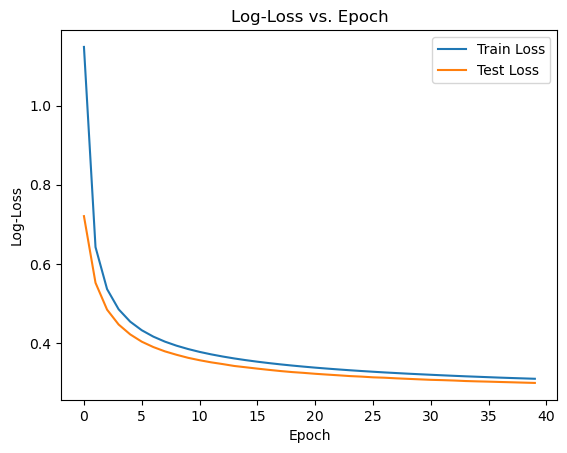

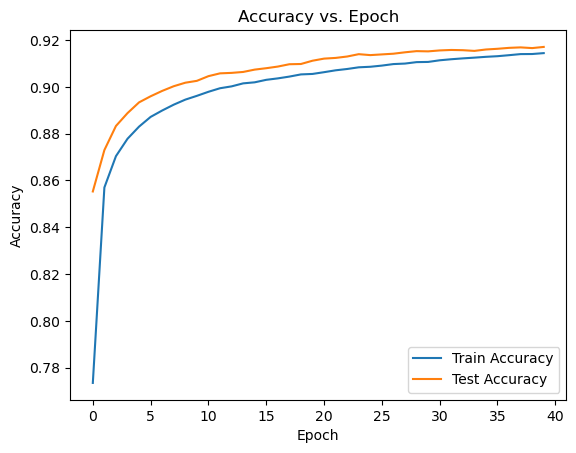

In [101]:
# Plot log-loss
plt.figure()
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Log-Loss")
plt.legend()
plt.title("Log-Loss vs. Epoch")
plt.show()

# Plot accuracy
plt.figure()
plt.plot(train_accuracies, label="Train Accuracy")
plt.plot(test_accuracies, label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy vs. Epoch")
plt.show()

Class 0: Classification rate = 97.96%
Class 1: Classification rate = 97.36%
Class 2: Classification rate = 88.08%
Class 3: Classification rate = 90.50%
Class 4: Classification rate = 93.18%
Class 5: Classification rate = 86.21%
Class 6: Classification rate = 94.99%
Class 7: Classification rate = 91.25%
Class 8: Classification rate = 87.47%
Class 9: Classification rate = 89.10%


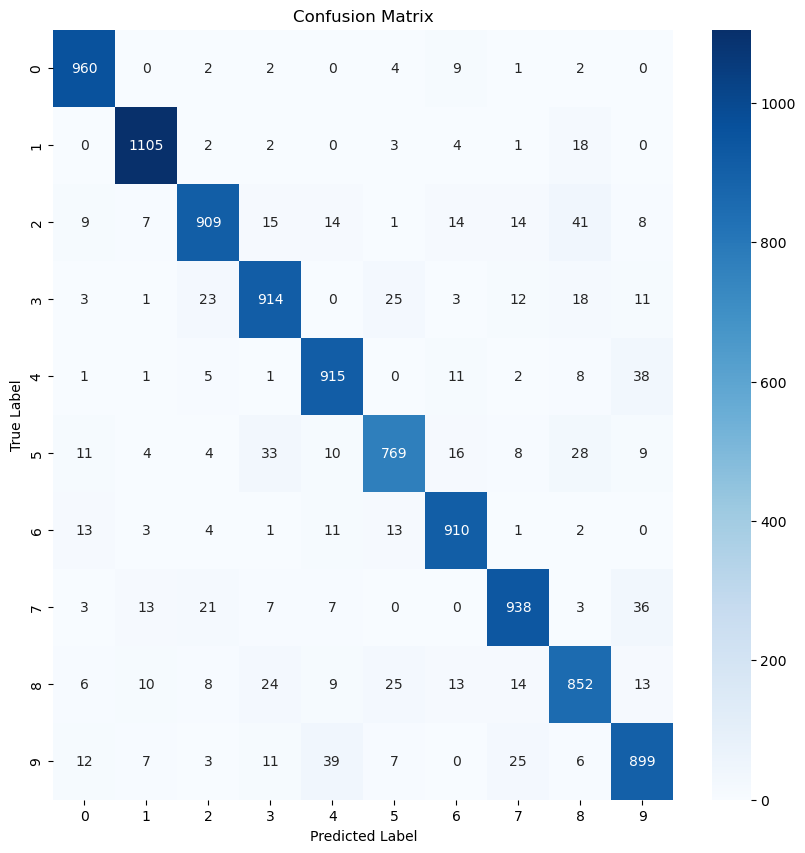

In [102]:
# Confusion matrix
y_true = []
y_pred = []

# Evaluate the model on test data
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, input_size)
        labels = torch.argmax(labels, dim=1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
classification_rate = np.diag(cm) / np.sum(cm, axis=1)
for i, j in enumerate(classification_rate):
    print(f"Class {i}: Classification rate = {j*100:.2f}%")

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".0f", cbar=True, xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()